In [5]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
y = iris.target

print("Iris dataset loaded with shape:", x.shape)
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)
print("First sample features:", x[0])
print("First sample label:", y[0])
# eucldiean dis

Iris dataset loaded with shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
First sample features: [5.1 3.5 1.4 0.2]
First sample label: 0


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
# euclidean distance from scratch 
import math
def euclidean_distance_fram_scratch(x1,x2):
    if len(x1) != len(x2):
        raise ValueError("Input vecots must have the same length")
    distance = 0.0
    for i in range(len(x1)):
        distance += ((x1[i] - x2[i])**2)
    return math.sqrt(distance)

euclidean_distance_fram_scratch(x[0],x[1])

0.5385164807134502

In [17]:
# building KNN from scratch
from collections import Counter
class KNN():
    def __init__(self,k=3):
        self.k = k

    def fit(self,x,y):
        if len(x) != len(y):
            raise ValueError("Input feature must be same length as target labels")
        self.x_train = x
        self.y_train = y

    def predict(self, X):
        """
        To predict over the n query points.
        """
        return [self._predict(x) for x in X]
    
    def _predict(self,x):
        """
        To predict over a single query point.
        We will find the k nearest neighbors  using euclidean distance, then we will
        sort the neighbors by distance and return the most common class label.
        """
        distances = []
        for i in range(len(self.x_train)):
            distance = euclidean_distance_fram_scratch(x,self.x_train[i])
            distances.append(distance)

        top_k = np.argsort(distances)[:self.k]

        top_k_elements = [self.y_train[i] for i in top_k]

        most_common = Counter(top_k_elements).most_common(1)

        return most_common[0][0]
        




In [27]:
# testing code

knn = KNN(7)
knn.fit(x_train,y_train)

predictions = knn.predict(x_test)

#show Predictions

print("Prediction: ", predictions[:10])
print("True Labels: ",y_test[:10])

Prediction:  [1, 0, 2, 1, 1, 0, 1, 2, 2, 1]
True Labels:  [1 0 2 1 1 0 1 2 1 1]


In [35]:
# evaluation part

# accuracy = (total_correct_predictions)/total_predicitons

def accuracy(y_test,y_pred):
    total_predictions = len(y_test)

    correct_predictions_index = []
    for i in range(total_predictions):
        if y_test[i] == y_pred[i]:
            correct_predictions_index.append(i)
    return len(correct_predictions_index)/total_predictions,correct_predictions_index



In [36]:
accu, _ = accuracy(y_test,predictions)
print(accu)

0.9666666666666667


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


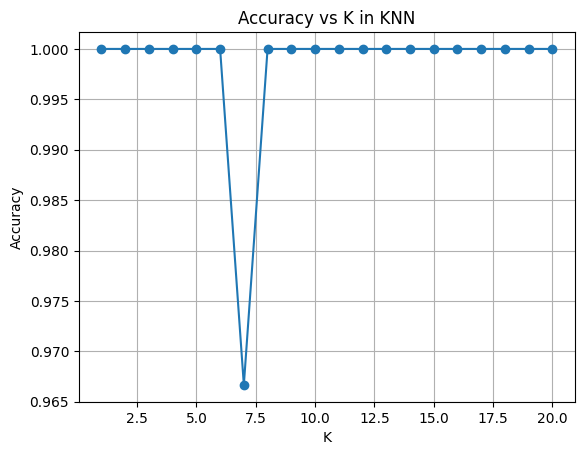

In [40]:
import matplotlib.pyplot as plt

k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNN(k=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accu,_ = accuracy(y_test, y_pred)
    accuracies.append(accu)
print(accuracies)

# Plot
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K in KNN')
plt.grid(True)
plt.show()
